# Regularized Linear Regression and Bias-Variance Trade-Off

In [43]:
#needed to work!
available_graphics_toolkits
graphics_toolkit('gnuplot')

ans = 
{
  [1,1] = gnuplot
}


In [44]:
%% Initialization
clear ; close all; clc

warning ("off", "Octave:broadcast");
warning ("off", "Octave:possible-matlab-short-circuit-operator");
warning ("off", "Octave:divide-by-zero");

## Loading and Visualizing Data

In [45]:
%plot -f svg

Loading and Visualizing Data ...


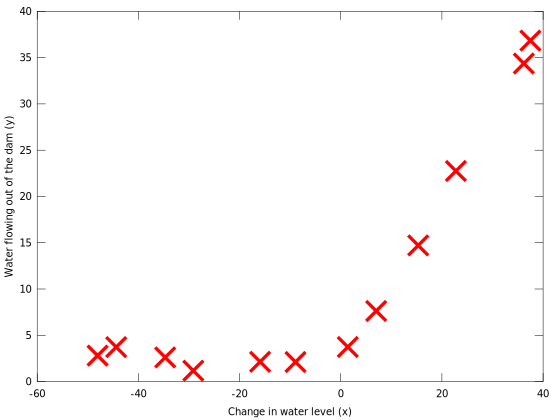

In [46]:
% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('data/ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

## Regularized Linear Regression Cost

In [47]:
theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f \n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


## Regularized Linear Regression Gradient

In [48]:
theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


## Training Linear Regression

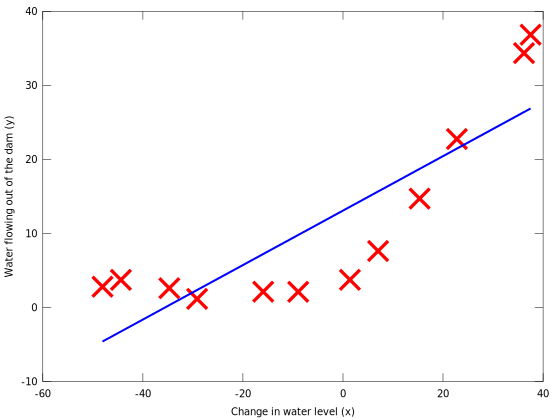

In [51]:
%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

## Learning Curve for Linear Regression

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	210.522449
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


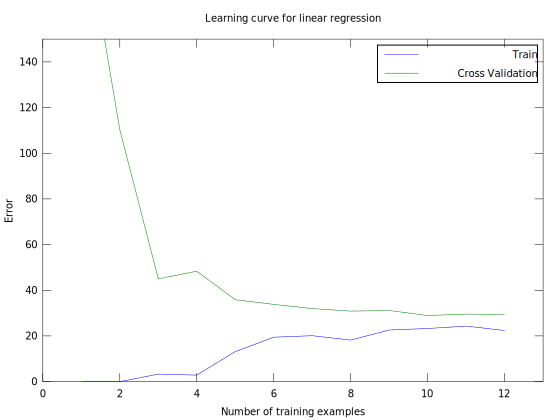

In [52]:
lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

## Feature Mapping for Polynomial Regression

In [53]:
p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


## Learning Curve for Polynomial Regression

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	331.806752
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.601191
  	6		0.000015	10.542213
  	7		0.042028	7.795181
  	8		0.074085	5.674829
  	9		0.128514	7.812081
  	10		0.155167	8.101806
  	11		0.144595	9.696044
  	12		0.103943	9.211168
Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		2.277641	164.115794
  	2		0.045772	143.522890
  	3		2.911375	5.534713
  	4		1.499412	6.609883
  	5		1.199183	6.634076
  	6		0.924511	8.291980
  	7		1.540897	5.737166
  	8		1.422968	5.516444
  	9		1.553733	6.239740
  	10		1.441565	5.983045
  	11		1.308147	6.043752
  	12		2.076188	4.260625
Polynomial Regression (lambda = 10.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		2.277641	164.115794
  	2		0.102982	144.016335
  	3		49.869356	26.648249
  	4		40.312755	18.094762
  	5		31

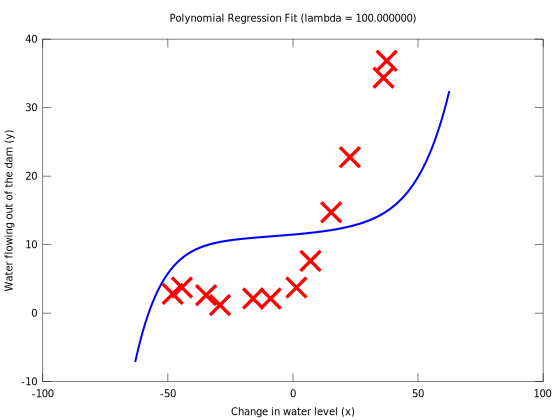

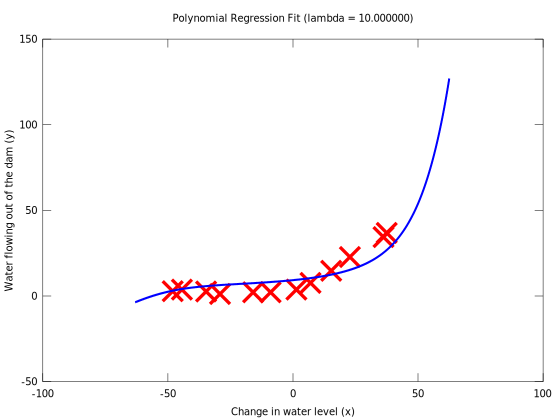

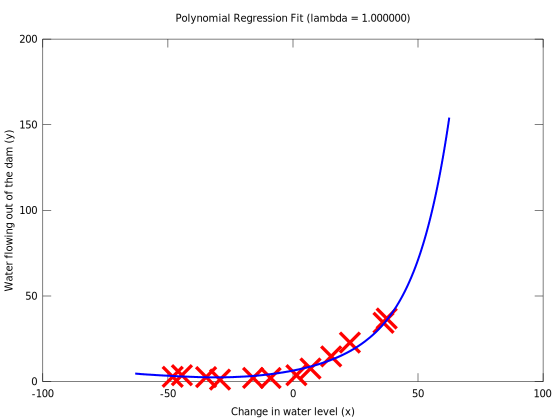

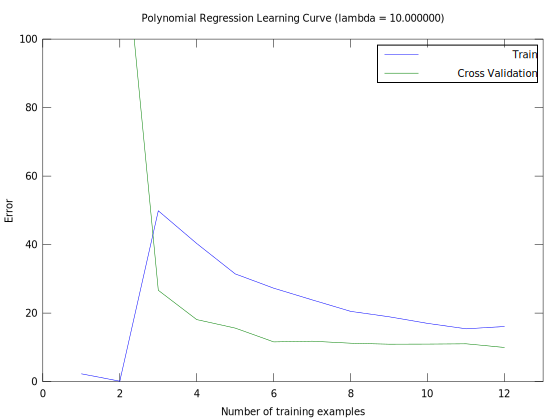

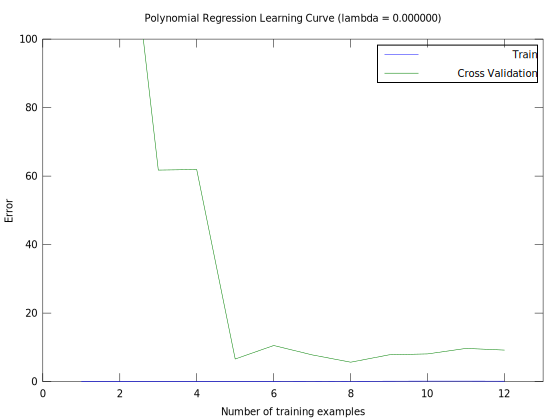

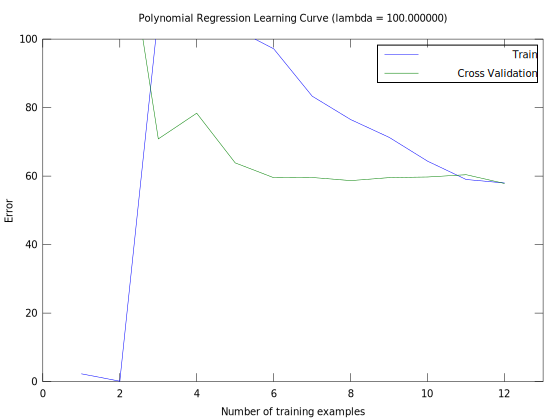

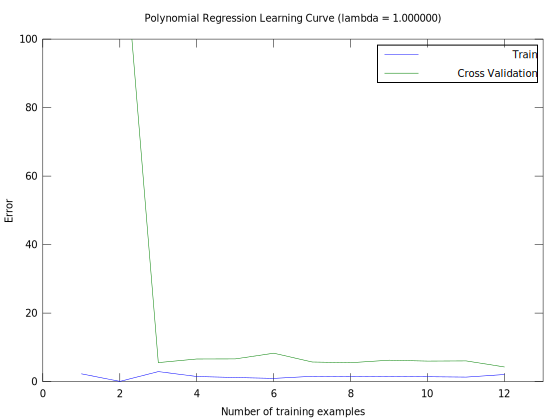

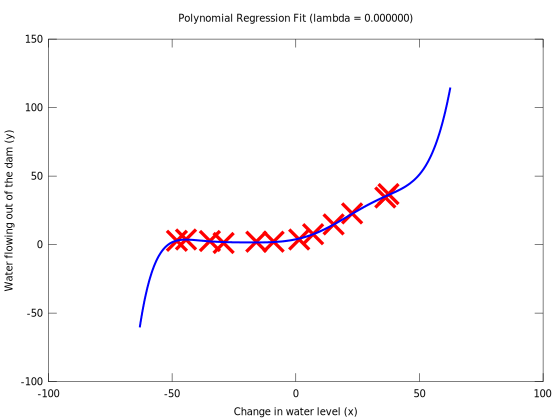

In [54]:
%lambda = 0;
lambd = [0,1,10,100];
%lambd = [];

for i=1:length(lambd)
    
    lambda = lambd(i);
    [theta] = trainLinearReg(X_poly, y, lambda);

    % Plot training data and fit
    %figure(1);
    figure(2*i-1);
    plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
    plotFit(min(X), max(X), mu, sigma, theta, p);
    xlabel('Change in water level (x)');
    ylabel('Water flowing out of the dam (y)');
    title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

    %figure(2);
    figure(2*i);
    [error_train, error_val] = learningCurve(X_poly, y, X_poly_val, yval, lambda);
    plot(1:m, error_train, 1:m, error_val);

    title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
    xlabel('Number of training examples')
    ylabel('Error')
    axis([0 13 0 100])
    legend('Train', 'Cross Validation')

    fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
    fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
    for i = 1:m
        fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
    end

    %fprintf('Program paused. Press enter to continue.\n');
    %pause;
end

## Validation for Selecting Lambda

lambda		Train Error	Validation Error
 0.000000	0.103943	9.211168
 0.001000	0.154944	17.440504
 0.003000	0.186595	18.741259
 0.010000	0.221891	17.019641
 0.030000	0.281851	12.829002
 0.100000	0.459318	7.587014
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260625
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


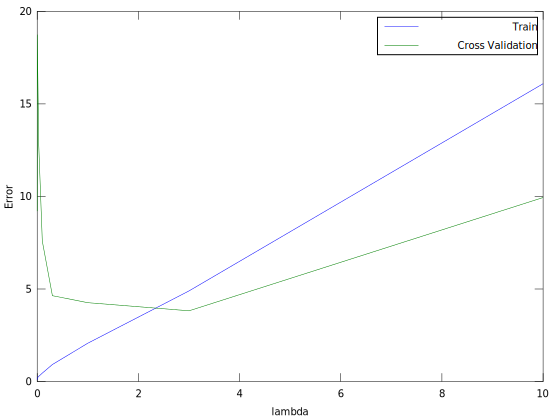

In [55]:
[lambda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
    fprintf(' %f\t%f\t%f\n', lambda_vec(i), error_train(i), error_val(i));
end

## Computing test set error

In [56]:
[min_error idx] = min(error_val);
lambda = lambda_vec(idx);
theta = trainLinearReg(X_poly, y, lambda);
error_test = linearRegCostFunction(X_poly_test, ytest, theta, 0); 
fprintf(' lambda\tTest Error\n');
fprintf(' %f\t%f\n', lambda, error_test);

%[lambda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_test, ytest);

%close all;
%plot(lambda_vec, error_train, lambda_vec, error_val);
%legend('Train', 'Cross Validation');
%xlabel('lambda');
%ylabel('Error');

%fprintf('lambda\t\tTrain Error\tValidation Error\n');
%for i = 1:length(lambda_vec)
%   fprintf(' %f\t%f\t%f\n', lambda_vec(i), error_train(i), error_val(i));
%end

 lambda	Test Error
 3.000000	3.859888


## Plotting learning curves with randomly selected examples


Polynomial Regression (lambda = 0.001000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.042359	273.684021
  	2		0.049907	51.064758
  	3		0.046931	43.787955
  	4		0.056903	36.428996
  	5		0.036260	64.926661
  	6		0.047615	73.083441
  	7		0.070369	93.795473
  	8		0.039747	30.693986
  	9		0.054834	270.853341
  	10		0.069191	104.828091
Polynomial Regression (lambda = 0.010000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.130362	51.858225
  	2		0.115234	29.936056
  	3		0.093866	32.818476
  	4		0.105884	39.265832
  	5		0.080827	23.844308
  	6		0.065164	37.353227
  	7		0.107964	330.270033
  	8		0.129683	229.790765
  	9		0.087970	85.915393
  	10		0.141329	434.107937
Polynomial Regression (lambda = 0.100000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.306900	45.513908
  	2		0.412646	56.193302
  	3		2.257320	113.058086
  	4		0.306844	15.363823
  	5		0.297189	48.416639
  	6		0.854754	46.072070
  	7		1.566737	86.230445
  	8		1.271603	103.68

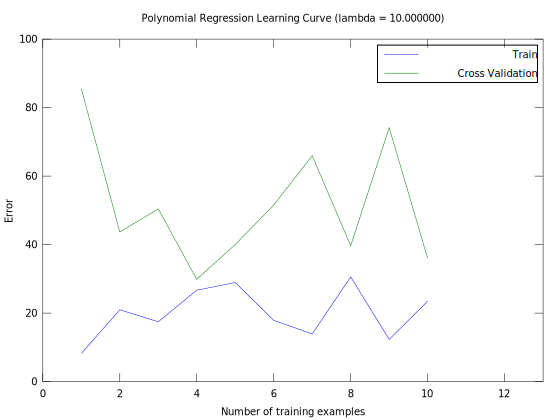

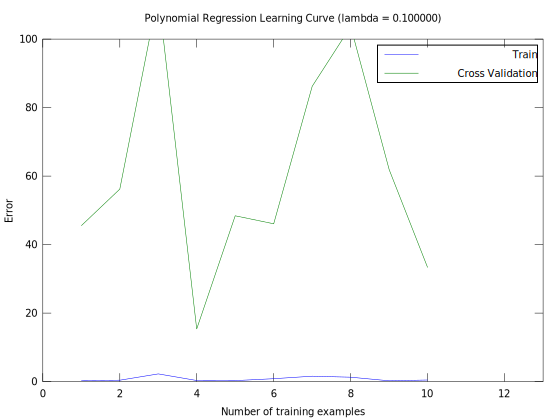

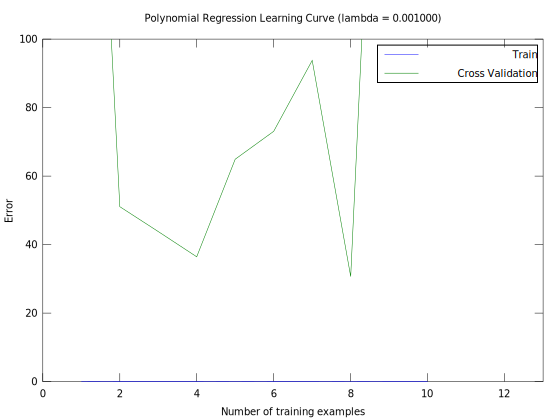

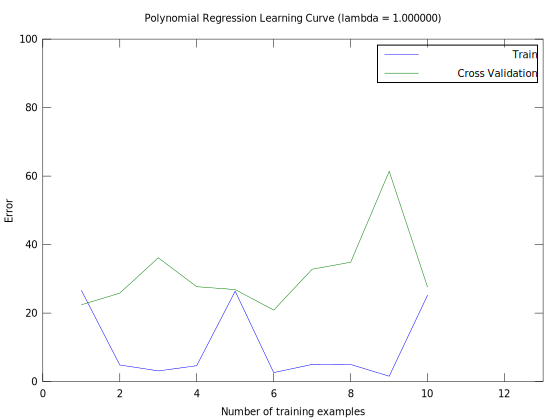

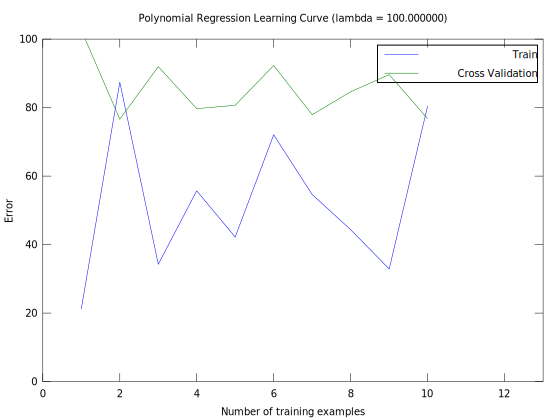

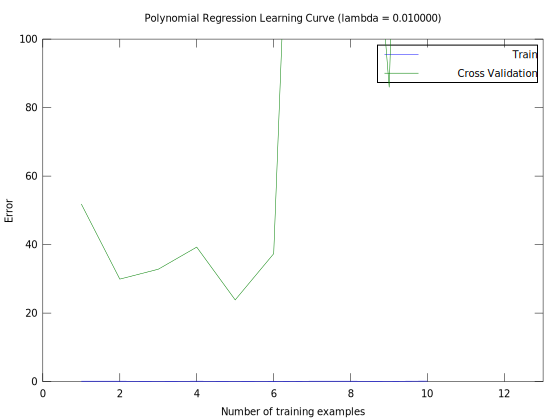

In [57]:
close all; clc

lambd = [0.001,0.01,0.1,1,10,100];
%lambd = [0.01];

for k=1:length(lambd) %select the lambda

    lambda = lambd(k);
    

    
    N = 10;
    
    error_train_avg = zeros(N,1);
    error_val_avg = zeros(N,1);
    
    for j=1:N %select the number of times to compute the average train and cv errors
        
        %=========== based on i compute the scrambled degree of the polynomial in Train and CV sets (X_poly, X_poly_val) ===========
        [X_poly_train_new y_poly_train_new] = subset(X_poly, y);
        [X_poly_val_new y_poly_val_new] = subset(X_poly_val, yval);
        
        %[train, val] = learningCurve( X_poly_train_new, y_poly_train_new, X_poly_val_new, y_poly_val_new, lambda );
        
        for i=1:length(y_poly_train_new)
            
            _Xpoly=X_poly_train_new(1:i,:);
            _ypoly=y_poly_train_new(1:i);
            
            theta = trainLinearReg(_Xpoly, _ypoly, lambda); %increase the m training to draw the curve
            error_train(i) = linearRegCostFunction(_Xpoly, _ypoly, theta, 0); %test the train over the (_x,_y)
            error_val(i) = linearRegCostFunction(X_poly_val_new, y_poly_val_new, theta, 0); %test the val over (Xval,yval)
        end
        
        error_train_avg(j) = sum(error_train)/size(error_train,1);
        error_val_avg(j) = sum(error_val)/size(error_val,1);
    end

    %error_train_avg
    %error_val_avg

    figure;
    
    hold on;
    
    plot(1:N, error_train_avg, 1:N, error_val_avg);
    title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
    xlabel('Number of training examples')
    ylabel('Error')
    axis([0 13 0 100])
    legend('Train', 'Cross Validation')
    
    hold off;
    
    fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
    fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
    for k = 1:N
        fprintf('  \t%d\t\t%f\t%f\n', k, error_train_avg(k), error_val_avg(k));
    end


end